<a href="https://colab.research.google.com/github/HindJamal97/Algorithm-for-Massive-Data/blob/main/FP_Growth(larger_sample).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#FIRST PART. 
#Install kaggle and upload + unzip our dataset. 

In [2]:
!pip install -q kaggle

In [3]:
#After installing kaggle, we need to upload the kaggle.json file with the API token given from out Kaggle account. 

In [4]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hindjamal","key":"5b2794cdd1f8c072feba270d5a765fa6"}'}

In [5]:
#Now we need to create a Kaggle folder, copy the kaggle.json to the folder created and finally we need to grant an approppriate permission for the json file to act. 

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#To list all the available datasets we have in Kaggle we use the following command

In [8]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          29766        822  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2892         78  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           5236        107  1.0              
mohithsairamreddy/salary-data 

In [9]:
#Finally, for our aim, we need to upload our dataset, and given that the url is the following one, we can download it as follows: 

In [10]:
!kaggle datasets download -d  xhlulu/medal-emnlp

100% 6.81G/6.82G [01:11<00:00, 134MB/s]
100% 6.82G/6.82G [01:11<00:00, 102MB/s]


In [11]:
from zipfile import ZipFile


In [12]:
file_name = "medal-emnlp.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("Done")

Done


In [13]:
#SECOND PART. 
#Install Spark and construct a software that can be used to find frequent itemset (RDD). 

In [14]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.3.2
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
# unzip it
!tar xf spark-3.3.2-bin-hadoop3.tgz

In [15]:
!pip install py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!java -version

openjdk version "11.0.19" 2023-04-18
OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [17]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.2-bin-hadoop3'

In [18]:
# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()

'/content/spark-3.3.2-bin-hadoop3'

In [19]:
!pip install pyspark
import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=680f536b4da77214c04329de50a4f180fefe2e7c87eb266c448b059ebaf1986e
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [20]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext   

In [21]:
conf = SparkConf()
conf = (conf
        .setAppName("AMD-MeDal")
        .setMaster('local[*]')
        .set('spark.executor.memory', '8G')
        .set('spark.driver.memory', '45G')
        .set('spark.driver.maxResultSize', '0'))
sc = SparkContext(conf=conf)

In [22]:
spark = SQLContext(sc)

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [23]:
sc

<SparkContext master=local[*] appName=AMD-MeDal>

In [24]:
spark

In [25]:
#Upload the file

In [26]:
dataset_path = '/content/full_data.csv'

In [27]:
df  = spark.read.format('csv') \
                .option('header', True) \
                .option('multiline', True) \
                .option('quote', '"') \
                .option('escape', '"') \
                .load(dataset_path)
df.printSchema()

root
 |-- TEXT: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- LABEL: string (nullable = true)



In [28]:
df.show()

+--------------------+--------------------+--------------------+
|                TEXT|            LOCATION|               LABEL|
+--------------------+--------------------+--------------------+
|alphabisabolol ha...|                  56|           substrate|
|a report is given...|24|49|68|113|137|172|carcinosarcoma|re...|
|the virostatic co...|                  55|           substrate|
|rmi rmi and rmi a...|   25|82|127|182|222|compounds|compoun...|
|a doubleblind stu...|22|26|28|77|90|14...|oxazepam|placebo|...|
|stroma from eithe...|         6|82|84|107|red cells|serum|a...|
|the effect of the...|                4|13|major|pentose pho...|
|in one experiment...|        32|44|76|135|feeding|feeding|a...|
|the presence of a...|7|15|63|137|199|2...|active|study|acti...|
|the reaction of g...|     113|203|209|250|stable|assay|bind...|
|choline acetyltra...|                  44|             caudate|
|increasing concen...|                  81|        displacement|
|the properties of...|   

In [29]:
df.head(3)

[Row(TEXT='alphabisabolol has a primary antipeptic action depending on dosage which is not caused by an alteration of the phvalue the proteolytic activity of pepsin is reduced by percent through addition of bisabolol in the ratio of the antipeptic action of bisabolol only occurs in case of direct contact in case of a previous contact with the ATP the inhibiting effect is lost', LOCATION='56', LABEL='substrate'),
 Row(TEXT='a report is given on the recent discovery of outstanding immunological properties in ba ncyanoethyleneurea having a low molecular mass m experiments in ds CS bearing wistar rats have shown that ba at a dosage of only about percent ld mg kg and negligible lethality percent results in a REC rate of percent without hyperglycemia and in one test of percent with hyperglycemia under otherwise unchanged conditions the REF substance ifosfamide if a further development of cyclophosphamide applied without hyperglycemia in its most efficient dosage of percent ld mg kg brought a

In [30]:
# Get row count
rows = df.count()

# Get columns count
cols = len(df.columns)

print(f"DataFrame Dimensions : {(rows,cols)}")
print(f"DataFrame Rows count : {rows}")
print(f"DataFrame Columns count : {cols}")
     

DataFrame Dimensions : (14393619, 3)
DataFrame Rows count : 14393619
DataFrame Columns count : 3


In [31]:
from pyspark.sql.functions import desc

In [32]:
counts = df.groupBy("LABEL").count().orderBy(desc("count"))

In [33]:
counts.show(20)

+-----------+------+
|      LABEL| count|
+-----------+------+
|      study|294977|
|      after|114472|
|    factors| 71336|
|development| 66812|
|     cancer| 61340|
|      model| 58257|
|     levels| 50882|
|   function| 50024|
|   specific| 44586|
|   approach| 43411|
|      large| 41973|
|      major| 40995|
|     groups| 40146|
|    quality| 38415|
|  effective| 37855|
| functional| 30441|
|    general| 29867|
|   efficacy| 28205|
|   symptoms| 26985|
|  compounds| 26977|
+-----------+------+
only showing top 20 rows



In [34]:
PD = counts.toPandas()

In [35]:
PD

,LABEL,count
0,study,294977
1,after,114472
2,factors,71336
3,development,66812
4,cancer,61340
...,...,...
7293077,element|feedback|variation|ultrasonic|feedback...,1
7293078,factors|culture|factors|human hepatoma|factors...,1
7293079,line|general|line|contact angle|contact angle|...,1
7293080,reference|physical|advanced,1


In [36]:
import seaborn as sns

[Text(0.5, 1.0, 'Label frequencies'),
 Text(0.5, 0, 'Label'),
 Text(0, 0.5, 'Count')]

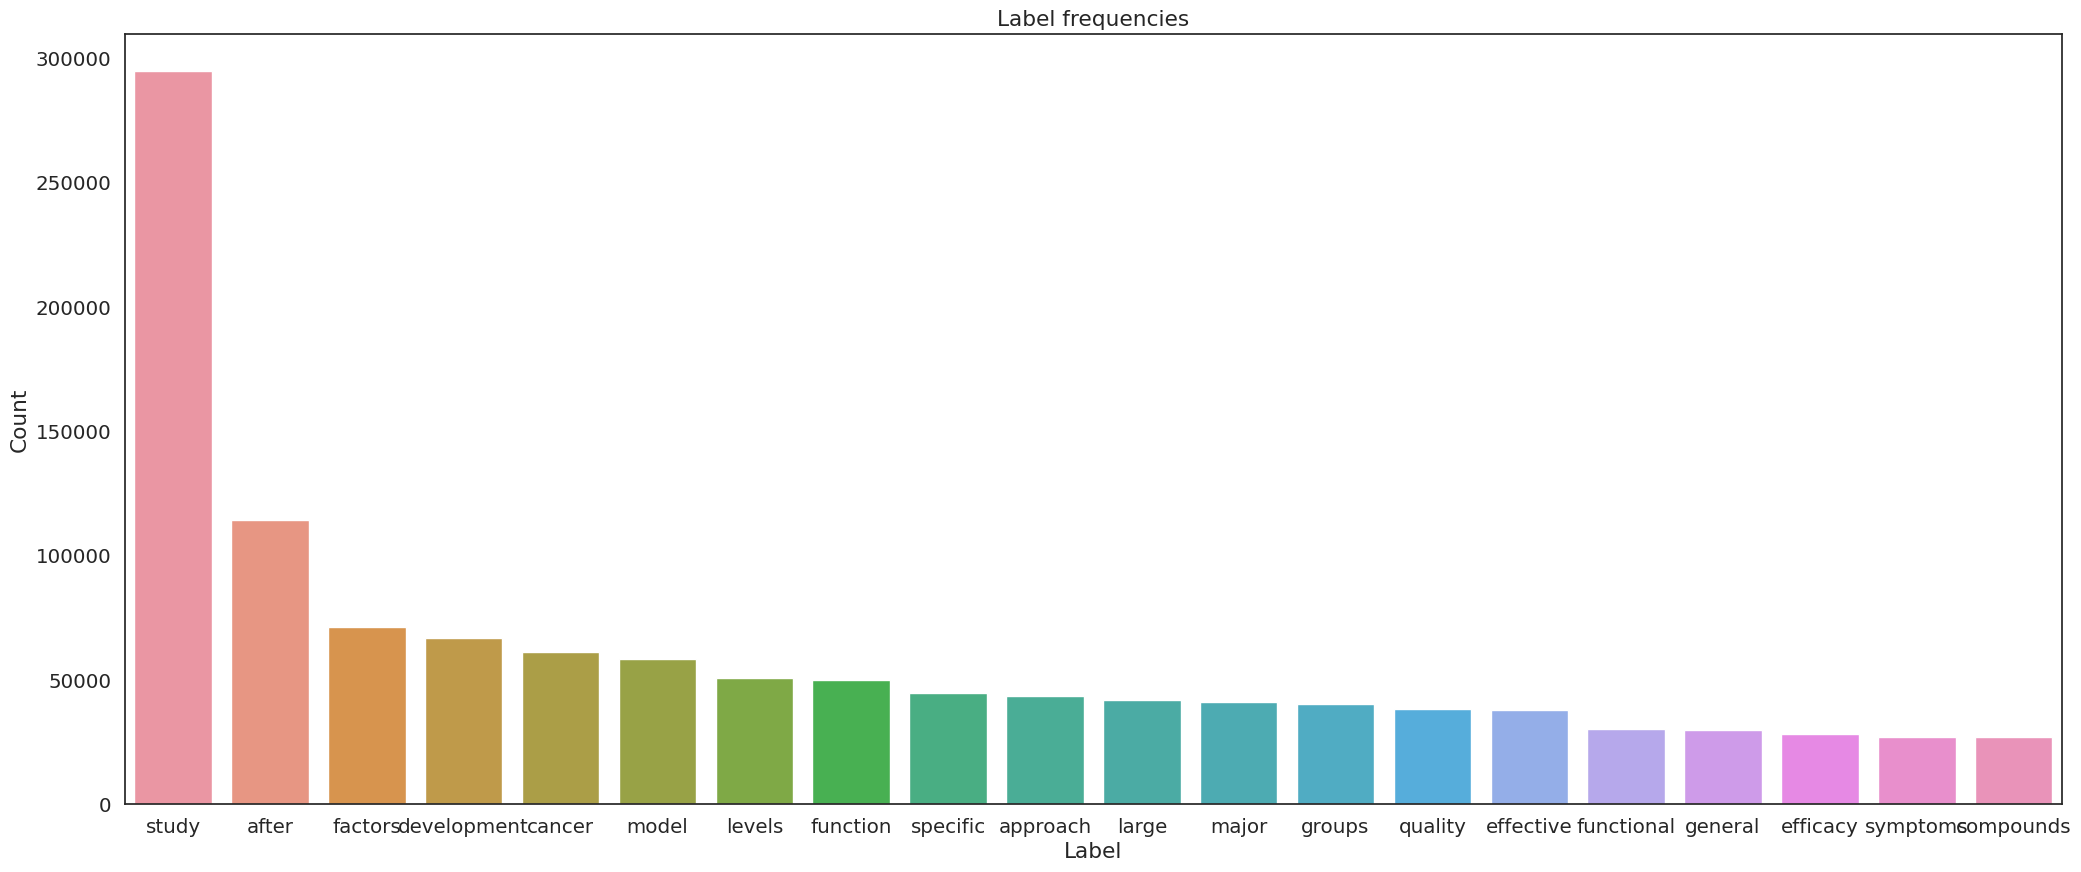

In [37]:
sns.set(rc={'figure.figsize':(25,10)}, style="white", font_scale=1.3)
ax = sns.barplot(x = PD.LABEL[0:20], y = "count", data = PD.head(40))
ax.set(title = "Label frequencies", xlabel = "Label",  ylabel = "Count")

In [38]:
DF = df.select('TEXT')

In [39]:
DF.show()

+--------------------+
|                TEXT|
+--------------------+
|alphabisabolol ha...|
|a report is given...|
|the virostatic co...|
|rmi rmi and rmi a...|
|a doubleblind stu...|
|stroma from eithe...|
|the effect of the...|
|in one experiment...|
|the presence of a...|
|the reaction of g...|
|choline acetyltra...|
|increasing concen...|
|the properties of...|
|primary amines re...|
|a purification pr...|
|dihydrofolate red...|
|ionization effect...|
|kinetic analyses ...|
|the nearultraviol...|
|the circular pola...|
+--------------------+
only showing top 20 rows



In [40]:
#Pre-processing of the data that we have!!

In [41]:
!pip install sparknlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 kB 23.9 MB/s eta 0:00:00


In [42]:
import sparknlp
import math
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.pretrained import PretrainedPipeline
from pyspark.ml import Pipeline
import pyspark.sql.types as T
from typing import List

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import csv
import time
from tqdm import tqdm

In [44]:
from pyspark.sql.functions import lower, col, udf

In [45]:
DF_lowercase = DF.withColumn("processed_text", lower(col("text")))

In [46]:
DF_lowercase.show()

+--------------------+--------------------+
|                TEXT|      processed_text|
+--------------------+--------------------+
|alphabisabolol ha...|alphabisabolol ha...|
|a report is given...|a report is given...|
|the virostatic co...|the virostatic co...|
|rmi rmi and rmi a...|rmi rmi and rmi a...|
|a doubleblind stu...|a doubleblind stu...|
|stroma from eithe...|stroma from eithe...|
|the effect of the...|the effect of the...|
|in one experiment...|in one experiment...|
|the presence of a...|the presence of a...|
|the reaction of g...|the reaction of g...|
|choline acetyltra...|choline acetyltra...|
|increasing concen...|increasing concen...|
|the properties of...|the properties of...|
|primary amines re...|primary amines re...|
|a purification pr...|a purification pr...|
|dihydrofolate red...|dihydrofolate red...|
|ionization effect...|ionization effect...|
|kinetic analyses ...|kinetic analyses ...|
|the nearultraviol...|the nearultraviol...|
|the circular pola...|the circul

In [47]:
from pyspark.sql.functions import regexp_replace, trim, col, lower


In [48]:
def removePunctuation(column):
   return lower(trim(regexp_replace(column,'\p{Punct}',''))).alias('sentence')

In [49]:
RemoveP = DF_lowercase.select(removePunctuation(col('processed_text')).alias("processed_text"))
RemoveP.show(5)

+--------------------+
|      processed_text|
+--------------------+
|alphabisabolol ha...|
|a report is given...|
|the virostatic co...|
|rmi rmi and rmi a...|
|a doubleblind stu...|
+--------------------+
only showing top 5 rows



In [50]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import trim,split,explode,col

In [51]:
tokenizer = Tokenizer(inputCol='processed_text', outputCol='words_token')
Data = RemoveP.withColumn("processed_text", trim(col("processed_text")))
DATA = tokenizer.transform(Data)
DATA.show(20)

+--------------------+--------------------+
|      processed_text|         words_token|
+--------------------+--------------------+
|alphabisabolol ha...|[alphabisabolol, ...|
|a report is given...|[a, report, is, g...|
|the virostatic co...|[the, virostatic,...|
|rmi rmi and rmi a...|[rmi, rmi, and, r...|
|a doubleblind stu...|[a, doubleblind, ...|
|stroma from eithe...|[stroma, from, ei...|
|the effect of the...|[the, effect, of,...|
|in one experiment...|[in, one, experim...|
|the presence of a...|[the, presence, o...|
|the reaction of g...|[the, reaction, o...|
|choline acetyltra...|[choline, acetylt...|
|increasing concen...|[increasing, conc...|
|the properties of...|[the, properties,...|
|primary amines re...|[primary, amines,...|
|a purification pr...|[a, purification,...|
|dihydrofolate red...|[dihydrofolate, r...|
|ionization effect...|[ionization, effe...|
|kinetic analyses ...|[kinetic, analyse...|
|the nearultraviol...|[the, nearultravi...|
|the circular pola...|[the, circ

In [52]:
from pyspark.ml.feature import StopWordsRemover

In [53]:
remover = StopWordsRemover(inputCol='words_token', outputCol='words_clean')
Df = remover.transform(DATA).select("processed_text",'words_clean')
Df.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [54]:
#The following code is trying to eliminate some duplicated words that we have in each sentence. 

In [55]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType,StringType    

In [56]:
get_uniques=udf(lambda x: list(set(x)), ArrayType(StringType()))

DataBase = Df.withColumn("words_clean", get_uniques(Df.words_clean))
DataBase.show(10)

+--------------------+--------------------+
|      processed_text|         words_clean|
+--------------------+--------------------+
|alphabisabolol ha...|[case, alteration...|
|a report is given...|[pronounced, deve...|
|the virostatic co...|[substance, prese...|
|rmi rmi and rmi a...|[hypotensive, lev...|
|a doubleblind stu...|[clear, obtained,...|
|stroma from eithe...|[lysis, pathway, ...|
|the effect of the...|[pathway, concent...|
|in one experiment...|[feeding, rumens,...|
|the presence of a...|[vmax, bindingdep...|
|the reaction of g...|[step, stable, ad...|
+--------------------+--------------------+
only showing top 10 rows



In [57]:
from pyspark.sql.functions import collect_set
from pyspark.sql.types import IntegerType

In [58]:
slen = udf(lambda s: len(s), IntegerType())
DB = DataBase.withColumn("word_count", slen(DataBase.words_clean))

In [59]:
DB.show()

+--------------------+--------------------+----------+
|      processed_text|         words_clean|word_count|
+--------------------+--------------------+----------+
|alphabisabolol ha...|[case, alteration...|        26|
|a report is given...|[pronounced, deve...|       123|
|the virostatic co...|[substance, prese...|        33|
|rmi rmi and rmi a...|[hypotensive, lev...|       105|
|a doubleblind stu...|[clear, obtained,...|        93|
|stroma from eithe...|[lysis, pathway, ...|        60|
|the effect of the...|[pathway, concent...|        25|
|in one experiment...|[feeding, rumens,...|        60|
|the presence of a...|[vmax, bindingdep...|        96|
|the reaction of g...|[step, stable, ad...|        81|
|choline acetyltra...|[using, ionexchan...|        76|
|increasing concen...|[protein, globula...|        65|
|the properties of...|[protein, builtin...|        95|
|primary amines re...|[protein, react, ...|        60|
|a purification pr...|[step, dhf, equil...|        91|
|dihydrofo

In [60]:
import pyspark.sql.functions as F

In [61]:
DB.createOrReplaceTempView("df_view")

baskets = spark.sql("SELECT processed_text, words_clean AS Basket, word_count FROM df_view")

In [62]:
baskets.show()

+--------------------+--------------------+----------+
|      processed_text|              Basket|word_count|
+--------------------+--------------------+----------+
|alphabisabolol ha...|[case, alteration...|        26|
|a report is given...|[pronounced, deve...|       123|
|the virostatic co...|[substance, prese...|        33|
|rmi rmi and rmi a...|[hypotensive, lev...|       105|
|a doubleblind stu...|[clear, obtained,...|        93|
|stroma from eithe...|[lysis, pathway, ...|        60|
|the effect of the...|[pathway, concent...|        25|
|in one experiment...|[feeding, rumens,...|        60|
|the presence of a...|[vmax, bindingdep...|        96|
|the reaction of g...|[step, stable, ad...|        81|
|choline acetyltra...|[using, ionexchan...|        76|
|increasing concen...|[protein, globula...|        65|
|the properties of...|[protein, builtin...|        95|
|primary amines re...|[protein, react, ...|        60|
|a purification pr...|[step, dhf, equil...|        91|
|dihydrofo

In [63]:
baskets.printSchema()

root
 |-- processed_text: string (nullable = true)
 |-- Basket: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- word_count: integer (nullable = true)



In [64]:
# Obtain a sample to work with that is 0.25% the size of the original dataset
sample = baskets.limit(35985)

In [65]:
sample.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [66]:
# Get row count
rows = sample.count()

# Get columns count
cols = len(sample.columns)

print(f"DataFrame Dimensions : {(rows,cols)}")
print(f"DataFrame Rows count : {rows}")
print(f"DataFrame Columns count : {cols}")
     

DataFrame Dimensions : (35985, 3)
DataFrame Rows count : 35985
DataFrame Columns count : 3


In [67]:
#FPGrowth

In [68]:
from pyspark.ml.fpm import FPGrowth

In [69]:
#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets using support, lift, and confidence.
fpGrowth = FPGrowth(itemsCol="Basket", minSupport=0.02, minConfidence=0.02)
model = fpGrowth.fit(sample)


In [70]:
# Display frequent itemsets.
mostPopularItemInABasket = model.freqItemsets
mostPopularItemInABasket.createOrReplaceTempView("mostPopularItemInABasket")
mostPopularItemInABasket.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|          [membrane]|2009|
|             [liver]|1896|
|   [liver, activity]| 739|
|             [eight]| 748|
|       [independent]| 738|
|               [age]|1440|
|             [andor]| 732|
|          [antigens]|1391|
|        [inhibition]|2425|
|[inhibition, effect]| 805|
|[inhibition, acti...| 962|
|              [flow]| 885|
|               [per]|2318|
|             [shows]| 874|
|        [previously]|1534|
|           [enzymes]|1696|
|   [enzymes, enzyme]| 799|
| [enzymes, activity]| 920|
|                [cm]| 774|
|               [gel]|1493|
+--------------------+----+
only showing top 20 rows



In [71]:
from pyspark.sql import SparkSession

In [72]:
query = """select items, freq
           from mostPopularItemInABasket
           order by freq desc
           limit 20"""
spark.sql(query).show()

+-----------+----+
|      items|freq|
+-----------+----+
| [activity]|7843|
|    [found]|7466|
|  [results]|7343|
|      [two]|7304|
| [patients]|7206|
|     [also]|6994|
|       [ph]|6643|
|    [cells]|6589|
|      [may]|6033|
|   [effect]|5951|
|      [one]|5727|
|  [studied]|5577|
| [observed]|5147|
|[increased]|4845|
|     [used]|4783|
|     [acid]|4676|
|   [normal]|4583|
|[different]|4555|
|   [showed]|4506|
|[treatment]|4474|
+-----------+----+



In [73]:
query = """select items, freq
           from mostPopularItemInABasket
           where size(items) > 1
           order by freq desc
           limit 20"""
spark.sql(query).show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|       [cell, cells]|2642|
|  [enzyme, activity]|2487|
|          [one, two]|2211|
|      [ph, activity]|2096|
|   [found, activity]|1955|
|    [also, activity]|1868|
|        [two, found]|1801|
|       [also, found]|1777|
|          [acid, ph]|1738|
|        [enzyme, ph]|1706|
|     [two, activity]|1706|
|        [degrees, c]|1700|
|      [cells, found]|1684|
|  [effect, activity]|1677|
| [results, activity]|1672|
|[treatment, patie...|1670|
|   [cells, activity]|1669|
|     [patients, two]|1659|
|     [also, results]|1632|
|      [two, results]|1626|
+--------------------+----+



In [74]:
query = """select items, freq
           from mostPopularItemInABasket
           where size(items) > 2
           order by freq desc
           limit 20"""
spark.sql(query).show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[enzyme, ph, acti...|1098|
|    [degrees, c, ph]| 999|
|[purified, enzyme...| 737|
+--------------------+----+



In [75]:
# Display generated association rules.
associationRules = model.associationRules
associationRules.createOrReplaceTempView("associationRules")
associationRules.show()

+----------------+---------------+-------------------+------------------+--------------------+
|      antecedent|     consequent|         confidence|              lift|             support|
+----------------+---------------+-------------------+------------------+--------------------+
|       [optimum]|           [ph]| 0.8738404452690167| 4.733576459883421| 0.02617757398916215|
|[concentrations]|      [results]| 0.2211362248014661| 1.083696997069421|0.020119494233708488|
|[concentrations]|         [also]|0.23701893708002444|1.2194919146160537|0.021564540780880923|
|[concentrations]|    [increased]|0.22083078802687844| 1.640164273920995|0.020091704877032098|
|[concentrations]|         [high]|0.24984728161270617| 2.158644520728267|0.022731693761289425|
|[concentrations]|[concentration]|0.32467929138668294| 3.086812232641951|0.029540086147005696|
|[concentrations]|        [found]|0.24251679902260231| 1.168894590520807|0.022064749201055996|
|[concentrations]|          [low]|0.22785583384239

In [76]:
associationRules.count()

1127

In [77]:
assoc_rules = associationRules.toPandas()

In [78]:
assoc_rules.confidence.describe()

count    1127.000000
mean        0.206413
std         0.098279
min         0.091929
25%         0.137875
50%         0.192564
75%         0.239867
max         0.873840
Name: confidence, dtype: float64

In [79]:
assoc_rules.support.describe()

count    1127.000000
mean        0.026703
std         0.007311
min         0.020008
25%         0.021592
50%         0.024482
75%         0.029068
max         0.073419
Name: support, dtype: float64

In [80]:
query = """select antecedent as `antecedent (if)`, consequent as `consequent (then)`, confidence
           from associationRules
           order by confidence desc
           limit 20"""

res = spark.sql(query)
res.show()

+--------------------+-----------------+------------------+
|     antecedent (if)|consequent (then)|        confidence|
+--------------------+-----------------+------------------+
|           [optimum]|             [ph]|0.8738404452690167|
|       [degrees, ph]|              [c]|0.8256198347107438|
|           [degrees]|              [c]|0.7744874715261959|
|  [purified, enzyme]|       [activity]|0.6907216494845361|
|         [molecular]|         [weight]|0.6793893129770993|
|             [c, ph]|        [degrees]|0.6682274247491639|
|        [activities]|       [activity]|0.6586466165413534|
|[purified, activity]|         [enzyme]|0.6499118165784833|
|        [enzyme, ph]|       [activity]|0.6436107854630715|
|            [weight]|      [molecular]|              0.64|
|             [amino]|           [acid]|0.6384180790960452|
|           [therapy]|       [patients]|0.6361355081555834|
|       [temperature]|             [ph]|0.6083569405099151|
|              [cell]|          [cells]|

In [81]:
associations = model.transform(baskets)
associations.show(n=200)

+--------------------+--------------------+----------+--------------------+
|      processed_text|              Basket|word_count|          prediction|
+--------------------+--------------------+----------+--------------------+
|alphabisabolol ha...|[case, alteration...|        26|[inhibition, enzy...|
|a report is given...|[pronounced, deve...|       123|[inhibition, enzy...|
|the virostatic co...|[substance, prese...|        33|[results, also, c...|
|rmi rmi and rmi a...|[hypotensive, lev...|       105|[changes, differe...|
|a doubleblind stu...|[clear, obtained,...|        93|[activity, enzyme...|
|stroma from eithe...|[lysis, pathway, ...|        60|[activity, result...|
|the effect of the...|[pathway, concent...|        25|[enzyme, amino, p...|
|in one experiment...|[feeding, rumens,...|        60|[activity, result...|
|the presence of a...|[vmax, bindingdep...|        96|[results, patient...|
|the reaction of g...|[step, stable, ad...|        81|[changes, decreas...|
|choline ace